# Quantum Measurements

## Dependencies and Imports

In [1]:
import pennylane as qml
from pennylane import numpy as np

## Introduction

Measurement in quantum physics and quantum computing is the source of quite a lot of debate by professionals and amateurs alike. What constitutes a measurement? Must it be framed in terms of interacting particles, or could a kind of non-measurment (or *null measurment* as Penrose refers to them) be treated as a measurement? What of the outcomes of measurements of quantum systems, and the infamous *wave-function collapse*? Various interpretations of quantum mechanics have been proposed such as the *Many-Worlds Interpretation* advocated by physicists such as Sean Carroll, the *Copenhagen interpretation* originally by Bohr and Heisenberg in the mid-1920s, various kinds of *Hidden Variables* theories at times advocated for by Einstein, Weyl, and others, the *Objective Collapse Theory* of Sir Roger Penrose, one of its cousins *GRW-theory* developed by Ghirardi, Rimini, and Weber, the *Relational Quantum Physics* of Carlo Rovelli, and numerous of others. 

The main issue many of these interpretations attempt to address is the **measurement problem**. The *measurement problem* goes back to the foundations of quantum mechanics and must to some degree be adressed in quantum computing, if for no other reason than to make out assumptions about how quantum computers work clear. Physicists when studying a quantum mechanical system, for example, a quantum computer, want to be able to separate this system from the environment. They want to remove all external influence on the system so that they can observe what happens to the quantum computer in experiements. The traditional thinking goes something like this. If we remove external influence on the system and nothing interferes with the quantum computer's processes, then we should be able to measure its state and read off the exact state that the quantum computer is in. The quantum system that we are measuring behaves according to very clear, deterministic mathematics. The mathematics that describe the system are very precise and clear on what state the system should be in at any given time. 

One then wants to measure the system in question. For example, in some implmentations of a quantum computer a microwave pulse (light) is applied to the quantum computer. This is effectively a photon (or perhaps many photons) which hit some subset of the qubits in the quantum computer. They are reflected back, and some property is changed such as the frequency of the photon. This serves as a way of "measuring" the state of the system. There are essentially two problems that arise. First, interacting with a quantum system such as our system of qubits in this way actually changes the state of the qubits. In fact, hitting the system with photons is one way of manipulating the system so that it is in some state we want. So, there is no real way to measure the quantum system without interacting with it and changing it in some way. The next issue that arises is that the outcome of the measurement behave *probabilistically*. In particular, the measurement outcomes *in general* do not have a single well defined outcome. In the case of a spin-measurement on a qubit for example, we might measure things in some particular basis like the $|0\rangle, |1\rangle$ $Z$-basis, and if the state hasn't been prepared to be spin-up or spin-down, then we will measure $|0\rangle$ sometimes, and $|1\rangle$ at other times. 

We have seen that applying the Hadamard gate to a single qubit prepared in the $|0\rangle$ state will put it into a superposition 

\begin{align}
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )
\end{align}

Measuring in the $Z$-basis then gives $|0\rangle$ 50% of the time, and $|1\rangle$ 50% of the time. This is very often cited as a *strange* and *bizarre* phenomenon of quantum physics. For someone approaching things from an information theoretic and probabilistic perspective it may seem less odd. To someone with certain cognitive biases towards the system, such as someone who has spent many years learning "classical physics", it may feel very strange. What might seem less strange is the **expectation value**, which we will discuss in this chapter. The *expectation value* is the average value observed. 

Explaining measurement in terms of interactions with the environment, and accepting that the environment cannot be completely separated from the quantum system we are measuring is one point of view we advocate for in this book. This allows us to use a second *spooky* property of quantum physics to help explain measurment...**entanglement**. *Entanglement* is something that happens when particles interact with each other. So, a measurment in the sense we have described above where a particle interacts with a photon or a measuring device like some kind of detector or photo-sensitive film can be thought of as the system becoming entangled with that particle or device. If we allow for entanglement to happen between more and more particles, and think of "measurment" as a kind of dispersion of information through a large system of entangled particles, then we don't need to grapple with situations where one has to "explain when the wave-function collapses," a common problem in quantum mechanics. 

What of systems where the absense of measurment can be treated as a measurement though? For example, Penrose describes *null-measurement*, where a beam of light goes through a beam-splitter, and photons are in superposition of either being *reflected* $|\rho\rangle$, or *transmitted* $|\tau\rangle$. The state of the photon is then $|\psi\rangle = |\rho\rangle + |\tau\rangle$. If we emit photons, and at some moment in time we have a detector that *does not register* a photon, then we can assume the photon has been *reflected*, and thus has *collapsed* into the state $|\rho\rangle$. 

Rather than grapple with wave-function collapse and attempt to define a moment in space and/or time when this occurs, we can think of the information being distributed in a "wave-function" like fashion throughout the environment as entanglement, so that the entire environment including the detector (and indeed the entire universe) is in an entangled state. The route we advocate from here is that of **Relational Quantum Physics**, developed initially by Carlo Rovelli. *Relation Quantum Mechanics* or RQM, has not traditionally been as popular as the *Copenhagen interpretation* or the *Many-Worlds Interpretation*, but it is also not incompatible with them. The RQM model is in line with a *control-theory* approach to building quantum computers as well, and we will mention briefly the connection momentarily. This is also compatible with the notion that all systems, no matter their size, are quantum mechanical in nature. 

One reason for treating all systems as inherently quantum mechnical, rather than say drawing a linea between the quantum realm and the classical realm, is that there have been many macroscopic quantum phenomena observed and created. One such case is of superconductivity, which is fundamental in certain quantum computing hardware. Other macroscopic quantum phenomena which may be important for applications can be observed in biological systems such as DNA, which can be used for data storage and processing and which has optical activation frequencies, making it [stable in its effective ground state at room temperature](https://www.youtube.com/watch?v=2nqHOnVTxJE&t=62s). Various other cases have been observed where matter has some kind of topological order and protection against noise, errors, and decoherence, even at room temperature. So treating all systems as fundamentally quantum in nature is necessary to our approach and to our desire to apply quantum computing techniques to solve actual problems. Now, let's have a look at what RQM is and what it says. 

Suppose Alice is observing the state of a qubit in superposition as mentioned above:

\begin{align}
|\psi\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )
\end{align}

Now, denote the Hilbert space of the qubit system by $\mathbb{H}_S$. Let's also include a physical measureing device $O$, and let's call the system of particles that make up the measuring device by $\mathbb{H}_O$. Now, say the measuring device sends a microwave pulse to the qubit to measure its state. Let's suppose for the moment that the outcome of the measurement is $|0\rangle$ (the argument works the same if we assume it was $|1\rangle$). Then there is a physical interaction between the device and the qubit. The device "sees" the following:

\begin{align}
\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \mapsto_{\text{measurement}} |0\rangle
\end{align}

However, from Alice's perspective, she may describe the interaction between the measuring device and the qubit as forcing the entanglement of the device's particles and the qubit which give a state in $\mathbb{H}_S \otimes \mathbb{H}_O$ after "measurement":

\begin{align}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes O_{\text{initial}} \mapsto_{\text{measurement}} \frac{1}{\sqrt{2}}|0\rangle \otimes O_{|0\rangle} + \frac{1}{\sqrt{2}}|1\rangle \otimes O_{|1\rangle}
\end{align}

where $O_{\text{initial}}$ is the intitial state of the measuring device. Taking this a step further, we might introduce another observer, Bob. If Alice interacts with the system $\mathbb{H}_S \otimes \mathbb{H}_O$ by "measuring" it, i.e. by interacting with the measuring device to ascertain its state, then she becomes entangled with the system, and Bob then decribes Alice in superposition. If we let $\mathbb{H}_A$ denote Alice's Hilbert space of particles, then Bob can describe a "unitary evolution" of the entangled system $\mathbb{H}_S \otimes \mathbb{H}_O \otimes \mathbb{H}_A$. Any "measurement" of the system by Bob, then forces him to become entangled with this system. 

So, the idea is, one can describe the "unitary evolution" of a quantum mechnical system according to some "Hamiltonian", until one interacts with the system, by making a measurement of some kind for example. At this point, one is entangled with the system and can no longer describe the evolution of the system because one is part of the system. Another outside observer can come along, and can in principle describe the evolution of the state of the system according the the Schrödinger equation, but the moment one interacts with the system in some way, one can no longer do this and is entangled with the quantum system which is being observed. Some of these terms have not been made clear because this would require us to delve deeper into mathematics that are beyond the scope of the current chapter and this would take us too far away from our current goal of understanding how measurment can actually be performed and what they mean when we are using actual quantum computers. For this we turn to a kind of *control theory*. 

**Control Theory** is a mathematical discipline that deals with the control of dynamical systems in engineering. For example, a paper in Nature on Google's Sycamore processor which was used in late 2019 to show quantum supremecy, shows how to 

> "execute single-qubit gates by driving 25-ns microwave pulses resonant with the qubit frequency while the qubit–qubit coupling is turned off". 

They go on to describe their quantum processor saying, 

> "Gate performance varies strongly with frequency owing to two-level-system defects, stray microwave modes, coupling to control lines and the readout resonator, residual stray coupling between qubits, flux noise and pulse distortions. We therefore optimize the single-qubit operation frequencies to mitigate these error mechanisms."

While we will not go deeply into the control theory behind controlling qubits, implementing quantum gates, and measurement, it is important to take note that this is fundamental to hardware implementations. We will revisit some of these topics later on in the text when we discuss quantum error correcting codes, which are a model of quantum computation for building hardware as well as coding certain algorithms and circuits, which are robust against external noise. Examples of error correcting codes can be found in nature in certain quantum mechanical processes, but the theory is still relatively new. Finding or construcing materials which display some kind of topological order can be seen as the hardware side of error corrction. Developing circuits which encode logical qubits into several physical qubits can be seen as the algorithmic or software side of error correction. Adding to this a layer of machine learning topological properties of matter, and of optimizing algorithms for specific hardware can be seen as yet another layer which can help in building very large scale quantum computers with millions of qubits. We will discuss this in later chapters as well. For now, let's have a closer look at measurments. 

## Self-Adjoint (Matrix) Operators

Measurement in quantum mechanics and quantum computing are a common source of contention for philosophical reasons which we will discuss a little here to lighten the mood. At its most basis, measurement of a single qubit in the state 

\begin{align}
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle =
\begin{pmatrix} \alpha \\ \beta \end{pmatrix}
\end{align}

returns the classical bit-value "$0$" with probability $|\alpha|^2$ and it returns the bit-value "$1$" with probability $|\beta|^2$. Remember $|\alpha|^2 + |\beta|^2 = 1$, and $\alpha$ and $\beta$ are complex numbers. Measurments can of course be much more complicated though and can involve several qubits. This requires linear algebra to understand. Let's have a look at a little of what [Wikipedia](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics) has to say about measurements:

> "In quantum mechanics, each physical system is associated with a Hilbert space. The approach codified by John von Neumann represents a measurement upon a physical system by a "**self-adjoint**" operator on that Hilbert space termed an "**observable**". These observables play the role of measurable quantities familiar from classical physics: **position, momentum, energy, angular momentum** and so on." 

Okay, so let's go through some of these new terms and talk a little bit about what this means. First, the term **observable** for us will alway mean a matrix, like the quantum gates we have looked at in the previous chapters. The matrix is "**self-adjoint**" just means that this matrix, call it $A$, has the following property:

\begin{align}
\langle A\psi , \phi \rangle = \langle \psi , A\phi \rangle
\end{align}

or, in notation more common to physics, 

\begin{align}
\langle \psi |A^{\dagger}| \phi \rangle = \langle \psi | A| \phi \rangle.
\end{align}

This is a little abstract and the notation is a bit different from what we have seen so far, so let's look at a specific example. Let's use the following matrix:

\begin{align}
A = 
\begin{pmatrix}
1 & 0 & 3 \\
0 & -i & 2 \\
2-i & 0 & 0
\end{pmatrix}
\end{align}

The notation here in the physics literature can get a little confusing. The reason is row vectors are usually written as "ket-vectors". So, for example if the (column) vector is

\begin{align}
v = \begin{pmatrix}
2 \\ 3i \\ 1+i
\end{pmatrix}
\end{align}

then in physics it is often written as "$|v\rangle$". The row vector version of it is the conjugate transpose (like a $3 \times 1$ column matrix Hermitian conjugate from the first chapter), which in math texts is often written at $(v^*)$ and is called the "**dual vector**. In the physics literature this would be denoted by the bra-vector $\langle v|$. The reasons behind this come from the ability to express (column) vectors and their dual (row) vectors in terms of a basis and an inner product $\langle \bullet , \bullet \rangle$ on the vector space. This is all a bit technical mathematically and for those who do not have sufficient linear algebra background it may be a bit confusing. Here is where real confusion might arise for a beginner though. When we write something like

\begin{align}
\langle Av, w \rangle = \langle v, Aw \rangle
\end{align}

in the physics literature one sees the following notation:

\begin{align}
\langle v|A^{\dagger}|w \rangle = \langle v|A|w \rangle
\end{align}

where $A^{\dagger}$ is the Hermitian conjugate to $A$ that we discussed in the first chapter. What we are writing is meant to indicate that we multiply a (column) vector by a matrix $Av$, and then we are computing its "dual" $(Av)^* = \langle Av |$, and then we are multiplying this row vector by a column vector by taking their inner product $\langle Av, w \rangle$. Let's check and see if this property actually holds for the matrix $A$ we have chosen here. 

Define the matrix vector product:

\begin{align}
Av = 
\begin{pmatrix}
1 & 0 & 3 \\
0 & -i & 2 \\
2-i & 0 & 0
\end{pmatrix}
\begin{pmatrix}
2 \\ 3i \\ 1+i
\end{pmatrix} = 
\begin{pmatrix}
5+3i \\ 5+2i \\ 4-2i
\end{pmatrix}
\end{align}

This would usually be written as $A|v\rangle$ in physics literature, *NOT* as $|Av\rangle$. Now, computing its dual (row) vector using the Hermitian conjugate (the conjugate transpose) we have

\begin{align}
\langle Av| = \begin{pmatrix}
5-3i, & 5-2i, & 1-i
\end{pmatrix}
\end{align}

Let's check this with a little Python code to refresh our memory from the first chapter:

In [2]:
A = np.matrix([[1, 0, 3],
               [0, -1j, 2],
               [2-1j, 0, 0]])

v = np.matrix([[2],
               [3j],
               [1+1j]])

Av = A*v
print(Av)

[[5.+3.j]
 [5.+2.j]
 [4.-2.j]]


In [3]:
# Print the dual (row) vector by computing the Hermitian conjugate:
print(Av.H)

[[5.-3.j 5.-2.j 4.+2.j]]


Okay, so now let's say we have another (column) vector:

\begin{align}
w = \begin{pmatrix}
-i \\ 0 \\ 2-3i
\end{pmatrix}
\end{align}

In physics we would write this as $|w\rangle$. Now we compute $\langle Av,w \rangle$:

\begin{align}
\begin{pmatrix}
5-3i, & 5-2i, & 1-i
\end{pmatrix}
\begin{pmatrix}
-i \\ 0 \\ 2-3i
\end{pmatrix} = 11-13i
\end{align}

Checking this with a little Python code:

In [4]:
# Define w:
w = np.matrix([[-1j], 
               [0], 
               [2-3j]])

# Print the inner product <Av, w>:
print((Av.H)*w)

[[11.-13.j]]


Okay, now let's compute $\langle v|Aw \rangle$. First we take the dual of $v$, i.e. we compute $v^*$ which is a row-vector:

\begin{align}
v^* = \langle v| = \begin{pmatrix}
2, & -3i, & 1-i
\end{pmatrix}
\end{align}

Next, let's compute $Aw$, which is most often written in the physics literature as $A|w\rangle$ and *NOT* usually as $|Aw\rangle$:

\begin{align}
\begin{pmatrix}
1 & 0 & 3 \\
0 & -i & 2 \\
2-i & 0 & 0
\end{pmatrix}
\begin{pmatrix}
-i \\ 0 \\ 2-3i
\end{pmatrix} = 
\begin{pmatrix}
6 - 10i \\
4 - 6i \\
-1 - 2i
\end{pmatrix}
\end{align}

Let's do a quick Python check of our math:

In [5]:
A*w

matrix([[ 6.-10.j],
        [ 4. -6.j],
        [-1. -2.j]])

Now, let's compute $\langle v|Aw \rangle$:

\begin{align}
\langle v| Aw \rangle = \begin{pmatrix}
2, & -3i, & 1-i
\end{pmatrix}
\begin{pmatrix}
6 - 10i \\
4 - 6i \\
-1 - 2i
\end{pmatrix} = -9 - 33i
\end{align}

Just to be sure, let's check with Python:

In [6]:
(v.H)*(A*w)

matrix([[-9.-33.j]])

So, $\langle Av, w \rangle = 11-13i$ and $\langle v, Aw \rangle = -9-33i$. So, the matrix operator $A$ we have chosen is *NOT* **self-adjoint**. To see a self-adjoint operator, let's have a look at the Hadamard gate:

\begin{align}
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\end{align}

Let's run some Python code to compute $\langle Hv , w \rangle$ and $\langle v, Hw \rangle$ with the following two vectors:

\begin{align}
v = 
\begin{pmatrix}
2 \\ -i
\end{pmatrix}, \quad 
w = 
\begin{pmatrix}
1+i \\ 0
\end{pmatrix}
\end{align}

In [7]:
Hadamard = (1/np.sqrt(2))*np.matrix([[1, 1],
                                   [1, -1]])

v = np.matrix([[2],
               [-1j]])

w = np.matrix([[1+1j],
               [0]])

dualHv = (Hadamard*v).H

# Print <Hv, w>
print(dualHv*w)

# Print <v, Hw>
print((v.H)*(Hadamard*w))

[[0.70710678+2.12132034j]]
[[0.70710678+2.12132034j]]


They're equal! This means the Hadamard gate is **self-adjoint**. Now, matrices in quantum mechanics that fit this property are called "**observables**" and are one of the fundamental building blocks of "*measurements*". 

## Observables

In PennyLane there are three basic measurement related functions:

```
qml.sample()
qml.expval()
qml.var()
qml.probs(wires)
```


- Expectation value of the supplied observables are computed using `expval(op)`. 

- Sample from the supplied observable, with the number of shots determined from the `dev.shots` attribute of the corresponding device we have defined can be done using `sample(op)`. 

- Variance of the supplied observable can be computed using `var(op)`. 

- Probability of each computational basis state can be found using `probs(wires)`. 

Related to measurements, are the **observables**. PennyLane has several pre-defined observable, many of them, we have already seen. They are all **Hermitian** operators (matrices):

#### The Hadamard operator
```
qml.Hadamard(wires) 
```

#### The Pauli X operator
```
qml.PauliX(wires)
```

#### The Pauli Y operator
```
qml.PauliY(wires)
```

#### The Pauli Z operator
```
qml.PauliZ(wires)
```

#### An arbitrary Hermitian observable.
```
qml.Hermitian(array, wires)
```

Each of these observables are $2 \times 2$ matrix gates we have already seen in action, except for the arbitrary Hermitian matrix given by `qml.Hermtitian(array, wires)`. We've seen how to specify which wire a gate should act on with the Pauli operators, the Hadamard gate, the **CNOT** gate, and various others, but `qml.Hermitian()` also takes a complex matrix (array) as an argument. This matrix can act on any number of wires, but it must be an appropriate size. So, for example if we have it act on $N$-wires (or qubits), then it mist be of size $2^N \times 2^N$. As an example, let's have a look at a Hermitian matrix that acts on $3$-qubits. 

First, let's define a random $8 \times 8$ matrix with entries in the interval $[0, 1)$. 

In [8]:
A = np.random.rand(8, 8)

Now, let's force it to be a complex matrix by multiplying it by the imaginary number $i$ (or $j$ in Python code).

In [9]:
A = 1j*A

Next, so that we can use the Hermitian conjugate function, let's force this to be a matrix and not just an array.

In [10]:
A = np.asmatrix(A)

Now, the Hermitian property can also be phrased in terms of the entries of the matrix. In particular, if $M = M^{\dagger}$, then the entries must satisfy the property $a_{i,j} = a_{j,i}^*$ (complex conjugate). We can force this property by defining:

\begin{align}
M = \frac{1}{2}(A + A^{\dagger})
\end{align}

In [11]:
M = (A+A.H)/2
print(M)

[[0.+0.j         0.-0.044836j   0.-0.02505578j 0.-0.35317484j
  0.+0.08581419j 0.+0.31773477j 0.-0.32821157j 0.+0.30036915j]
 [0.+0.044836j   0.+0.j         0.-0.07611626j 0.-0.09701983j
  0.-0.10185345j 0.-0.02351514j 0.-0.37769544j 0.+0.22061282j]
 [0.+0.02505578j 0.+0.07611626j 0.+0.j         0.+0.22297582j
  0.-0.13556602j 0.+0.04105007j 0.+0.12760016j 0.-0.20817132j]
 [0.+0.35317484j 0.+0.09701983j 0.-0.22297582j 0.+0.j
  0.-0.0275473j  0.+0.30621141j 0.+0.00428726j 0.+0.20223877j]
 [0.-0.08581419j 0.+0.10185345j 0.+0.13556602j 0.+0.0275473j
  0.+0.j         0.+0.1451399j  0.-0.33681863j 0.+0.09928541j]
 [0.-0.31773477j 0.+0.02351514j 0.-0.04105007j 0.-0.30621141j
  0.-0.1451399j  0.+0.j         0.+0.30991324j 0.+0.02572538j]
 [0.+0.32821157j 0.+0.37769544j 0.-0.12760016j 0.-0.00428726j
  0.+0.33681863j 0.-0.30991324j 0.+0.j         0.-0.00634901j]
 [0.-0.30036915j 0.-0.22061282j 0.+0.20817132j 0.-0.20223877j
  0.-0.09928541j 0.-0.02572538j 0.+0.00634901j 0.+0.j        ]]


We can check to see that $M = M^{\dagger}$ as follows:

In [12]:
M == M.H

matrix([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

Let's quickly check that the Pauli-Z operator is Hermitian.

In [13]:
Z = np.matrix([[1, 0],
               [0, -1]])

In [14]:
Z == Z.H

matrix([[ True,  True],
        [ True,  True]])

## Expectation Values

Let's have a look at some of these in action. Here we define two devices. The first device `dev1` has a single "wire", i.e. it only contains a single qubit on which to operate. The second device `dev2` contains 2 "wires". 

In [15]:
dev1 = qml.device("default.qubit", wires=1, shots=20)
dev2 = qml.device("default.qubit", wires=2, shots=20)
# dev_IBM_sim = qml.device('qiskit.ibmq', wires=2, shots=50, backend='ibmq_qasm_simulator')
# devIBM = qml.device('qiskit.ibmq', wires=2, shots=10, backend='ibmq_ourense')

Now, let's define a `qnode()` that samples the circuit that applies the Hadamard gate to a single qubit, 20 times:

\begin{quantikz}
\lstick{\ket{0} } & \gate{H} & \qw  \meter{$Z$}
\end{quantikz}

In [16]:
@qml.qnode(dev1)
def circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0))

print(circuit())

[ 1  1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1]


Let's interpret this first by computing $\langle 0|H^{\dagger}$ and $H |0 \rangle $:

In [17]:
Had = (1/np.sqrt(2))*np.matrix([[1, 1],
                                [1, -1]])

d = np.matrix([[1],
               [0]])

psi = Had*d

print(psi.H)

[[0.70710678 0.70710678]]


In [18]:
print(psi)

[[0.70710678]
 [0.70710678]]


This ends up being

\begin{align}
\langle \psi| = \begin{pmatrix}
1/\sqrt{2}, & 1/\sqrt{2}
\end{pmatrix}, \quad 
|\psi \rangle
\begin{pmatrix}
1/\sqrt{2} \\ 1/\sqrt{2}
\end{pmatrix}
\end{align}

This can be written as,

\begin{align}
\langle \psi | = \frac{1}{\sqrt{2}}(\langle 0| + \langle 1|)
\end{align}

and

\begin{align}
|\psi \rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\end{align}

So, we expect to get "$+1$" with probability $|1/\sqrt{2}|$ and "$-1$" $|1/\sqrt{2}|$ when we return `qml.sample()` twenty times. This means we should get roughly 10 of each. What does this mean about the "average" value we should get? On average, we should expect to get "$0$". In other words, if we average out the measurements we get, we should get $0$. We can compute the **expectation value** with the following circuit, using the $Z$-basis:

\begin{quantikz}
\lstick{\ket{0} } & \gate{H} & \qw  \meter{$\langle Z \rangle$}
\end{quantikz}

In [19]:
@qml.qnode(dev1)
def circuit():
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

print(circuit())

0.0


Mathematically, we compute the following for this expectation value:

\begin{align}
\langle 0 |H^{\dagger} Z H |0 \rangle = \langle \psi |Z| \psi \rangle
\end{align}

Remember, $H^{\dagger}$ is the Hermitian conjugate to $H$. We can write this out as matrices:

\begin{align}
\frac{1}{2}\begin{pmatrix} 1, & 0 \end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
\end{align}

Let's have a look at some Python code that computes this for us:

In [20]:
# Define the Hadamard gate:
Had = (1/np.sqrt(2))*np.matrix([[1, 1],
                                [1, -1]])

# Define the initial basis state |0>:
d = np.matrix([[1],
               [0]])

# Define the Pauli-Z gate:
Z = np.matrix([[1, 0],
               [0, -1]])

# Define the state H|0>:
psi = Had*d

# Compute the expectation value:
print((psi.H)*Z*psi)

[[0.]]


This is exactly what the above circuit just computed for us, and in general, when we compute an expectation value on a single qubit. When we see *expectation value* we should think *average value*. 

Now, let's run the same circuit but let's measure in the $X$-basis using the Pauli-$X$ gate. Remember, in this basis, 

\begin{align}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |r\rangle = H|0\rangle
\end{align}

So, we should expect that the measurement comes out to be "$+1$" every time when we use `qml.sample(qml.PauliX(0))`.  

\begin{quantikz}
\lstick{\ket{0} } & \gate{H} & \qw  \meter{$X$}
\end{quantikz}

In [21]:
@qml.qnode(dev1)
def circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliX(0))

print(circuit())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Okay, let's write some linear algebra code to compute the expectation value

\begin{align}
\langle 0|H^{\dagger} X H |0 \rangle = \langle \psi |X|\psi \rangle
\end{align}

In [22]:
# Define the Hadamard gate:
Had = (1/np.sqrt(2))*np.matrix([[1, 1],
                               [1, -1]])
       
d = np.matrix([[1],
               [0]])
       
X = np.matrix([[0, 1],
               [1, 0]])
       
psi = Had*d
       
print((psi.H)*X*(psi))

[[1.]]


Now let's create a `qnode()` in PennyLane to compute the same expectation value. 

\begin{quantikz}
\lstick{\ket{0} } & \gate{H} & \qw  \meter{$\langle X \rangle$}
\end{quantikz}

In [23]:
@qml.qnode(dev1)
def circuit():
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliX(0))

print(circuit())

0.9999999999999996


As expected, the "average value", i.e. the *expectation value*, should be "$+1$" since in the $X$-basis the vector is written as

\begin{align}
0|l\rangle + 1|r\rangle = |r\rangle
\end{align}

So, we should expect to measure $|l\rangle$ with probability $|0|^2 = 0$, and we should expect $|r\rangle$ with probability $|1|^2 = 1$. 

## Multi-qubit Circuits and Measurements

Here we operate on the first qubit of 'dev2' with the Hadamard gate, then we apply the CNOT gate to both qubits. Finally, we measure the "local" values using the operators $Z \otimes I$ and $I \otimes Z$, separately. 

\begin{quantikz}
\lstick{\ket{0}} & \gate{H} & \ctrl{1} & \qw  \meter{$Z \otimes I$} \\
\lstick{\ket{0}} & \qw      & \targ{}  & \qw  \meter{$I \otimes Z$}
\end{quantikz}

In [24]:
@qml.qnode(dev2)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[-1  1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1]
 [-1  1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1]]


Now let's compute the expectation values:

\begin{quantikz}
\lstick{\ket{0}} & \gate{H} & \ctrl{1} & \qw  \meter{$\langle Z \otimes I \rangle$} \\
\lstick{\ket{0}} & \qw      & \targ{}  & \qw  \meter{$\langle I \otimes Z \rangle$}
\end{quantikz}

In [25]:
@qml.qnode(dev2)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

print(circuit())

[0. 0.]


Now let's measure using the operator $Z \otimes Z$. In PennyLane code, we can multiply the two operators $(Z \otimes I)(I \otimes Z)$ to get this measurement using the `@` operator. 

\begin{quantikz}
\lstick{\ket{0}} & \gate{H} & \ctrl{1} & \qw  \meter{$Z \otimes I$} \\
\lstick{\ket{0}} & \qw      & \targ{}  & \qw  \meter{$I \otimes Z$}
\end{quantikz}

In [26]:
@qml.qnode(dev2)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0) @ qml.PauliZ(1))

print(circuit())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Now let's get the expectation value $\langle Z \otimes Z \rangle$. Again, in PennyLane code, we can multiply the two operators $(Z \otimes I)(I \otimes Z)$ to get this expectation value using the `@` operator.

\begin{quantikz}
\lstick{\ket{0}} & \gate{H} & \ctrl{1} & \qw  \meter{$\langle Z \otimes I \rangle$} \\
\lstick{\ket{0}} & \qw      & \targ{}  & \qw  \meter{$\langle I \otimes Z \rangle$}
\end{quantikz}

In [27]:
@qml.qnode(dev2)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

print(circuit())

0.9999999999999998


Here, we perform all of the same operations as the previous circuits, but the initial basis state is $|11\rangle$. We apply the Hadamard gate to the first qubit of 'dev2', then we apply the CNOT gate. Finally, we measure using the $Z \otimes I$ and $I \otimes Z$ operators. 

\begin{quantikz}
\lstick{\ket{1}} & \gate{H} & \ctrl{1} & \qw  \meter{$Z \otimes I$} \\
\lstick{\ket{1}} & \qw      & \targ{}  & \qw  \meter{$I \otimes Z$}
\end{quantikz}

In [28]:
ud = np.array([1,1])

@qml.qnode(dev2)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

print(circuit())

[[ 1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1]
 [-1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1]]


Now we compute the expectation values $\langle Z \otimes I \rangle$ and $\langle I \otimes Z \rangle$ separately. 

\begin{quantikz}
\lstick{\ket{1}} & \gate{H} & \ctrl{1} & \qw  \meter{$\langle Z \otimes I \rangle$} \\
\lstick{\ket{1}} & \qw      & \targ{}  & \qw  \meter{$\langle I \otimes Z \rangle$}
\end{quantikz}

In [29]:
ud = np.array([1,1])

@qml.qnode(dev2)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

print(circuit())

[0. 0.]


Again, we obtain the measurement $\langle Z \otimes Z \rangle$ by multiplying $(Z \otimes I)(I \otimes Z)$ using the `@` operator. 

\begin{quantikz}
\lstick{\ket{0}} & \gate{H} & \ctrl{1} & \qw  \meter{$Z \otimes I$} \\
\lstick{\ket{0}} & \qw      & \targ{}  & \qw  \meter{$I \otimes Z$}
\end{quantikz}

In [30]:
ud = np.array([1,1])

@qml.qnode(dev2)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0) @ qml.PauliZ(1))

print(circuit())

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Finally, we obtain the expectation value $\langle Z \otimes Z \rangle$ by multiplying $(Z \otimes I)(I \otimes Z)$ using the `@` operator. 

\begin{quantikz}
\lstick{\ket{1}} & \gate{H} & \ctrl{1} & \qw  \meter{$\langle Z \otimes I \rangle$} \\
\lstick{\ket{1}} & \qw      & \targ{}  & \qw  \meter{$\langle I \otimes Z \rangle$}
\end{quantikz}

In [31]:
ud = np.array([1,1])

@qml.qnode(dev2)
def circuit():
    qml.BasisState(ud, wires=[0,1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

print(circuit())

-0.9999999999999998


We can of course perform more complicated measurements with tensor observables. For example, take a three wire circuit and measure the observable $Z \otimes I \otimes X$:

In [32]:
# Define a new 3 qubit device
dev3 = qml.device("default.qubit", wires=3, shots=20)

# Create the circuit
@qml.qnode(dev3)
def circuit():
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(2))

print(circuit())

0.0


There is no need to specify the identity matrix in the middle of $Z \otimes I \otimes X$. Here, PennyLane is computing the expectation value for:

\begin{align}
(Z \otimes I \otimes I)(I \otimes I \otimes X) &= (ZI \otimes II \otimes IX)\\
&= Z \otimes I \otimes X
\end{align}

and the `@` operator it performing the multiplication $(Z \otimes I \otimes I)(I \otimes I \otimes X)$. So PennyLane "knows" when we write `qml.expval(qml.PauliZ(0))` that we mean to compute $\langle Z \otimes I \otimes I \rangle$. Likewise, when we write `qml.expval(qml.PauliX(2))`, PennyLane "knows" we want $\langle I \otimes I \otimes X \rangle$. 

## Measurements in QISKit

Measurement in QISKit require creating a `QuantumRegister` which specifies the number of qubits (or wires), as well as a `ClassicalRegister` which will store the outcome of each measurements. So we will need as many classical bits as qubits if we want to measure every qubit. We can create a the registers and a quantum circuit in QISKit as follows. 

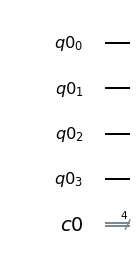

In [33]:
from qiskit import *
%matplotlib inline

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)
qc.draw(output='mpl')

We could also take a more abreviated version as follows.

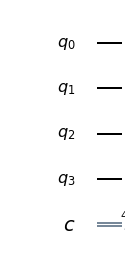

In [34]:
circ = QuantumCircuit(4,4)
circ.draw(output='mpl')

Measuring a single qubit in QISKit is simple. The following code measure the third qubit and stores it in the 3 classical bit. 

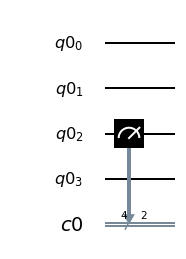

In [35]:
qc.measure(2,2)
qc.draw(output='mpl')

The next command measure qubits $0$ and $3$ and stores them in the corresponding classical bits. 

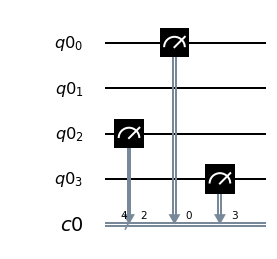

In [36]:
qc.measure([0,3], [0,3])
qc.draw(output='mpl')

If we want to actually run the circuit, we need to choose a backend device. Let's choose the `statevector_simulator` and plot the Bloch multi-vector on the Bloch spheres. 

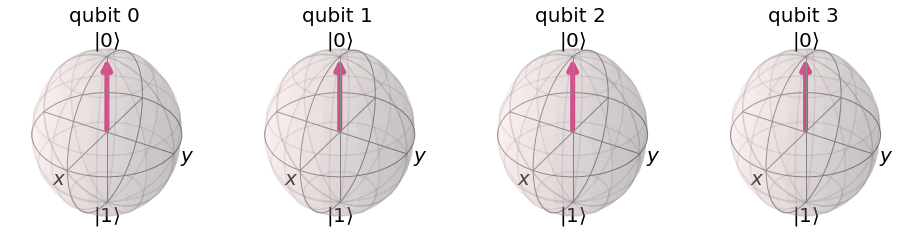

In [37]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
plot_bloch_multivector(out_state) 

On the second circuit we define above `circ`, lets measure all qubits after applying Hadamard gates. 

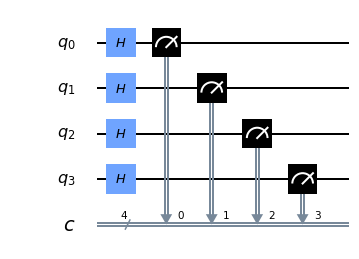

In [38]:
for j in range(4):
    circ.h(j)
    circ.measure(j,j)
    
circ.draw(output='mpl')

Now, let's define a different backend to run the circuit and plot the histogram of measurements from running $1024$ shots. 

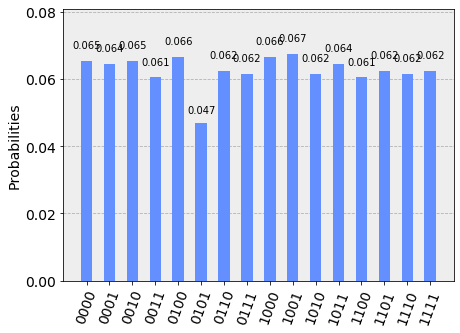

In [39]:
circ.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)